In [1]:
import pyrfume
import pandas as pd
from pprint import pprint
from IPython.display import Image
from predicting_odor_from_molecular_structure import *

In [3]:
df = goodscents()
df

,TGSC ID,CID,Concentration %,Solvent,MolecularWeight,IsomericSMILES,IUPACName,name,Labels
0,1000111,7476,100.0,NaN,150.17,CC(=O)C1=CC=C(C=C1)OC,1-(4-methoxyphenyl)ethanone,4'-methoxyacetophenone,"[sweet, vanilla, cherry maraschino cherry, pow..."
1,1031871,7478,10.0,dipropylene glycol,152.15,COC1=CC=C(C=C1)C(=O)O,4-methoxybenzoic acid,4-methoxybenzoic acid,"[phenolic, animal, fecal, medicinal]"
2,1009281,7501,0.1,triacetin,104.15,C=CC1=CC=CC=C1,styrene,styrene,"[sweet, plastic, floral, balsamic]"
3,1001651,244,100.0,NaN,108.14,C1=CC=C(C=C1)CO,phenylmethanol,benzyl alcohol,"[sweet, floral, rose, fruity, phenolic, balsam..."
4,1001491,240,10.0,dipropylene glycol,106.12,C1=CC=C(C=C1)C=O,benzaldehyde,benzaldehyde,"[sweet, cherry, cherry maraschino cherry, nutt..."
...,...,...,...,...,...,...,...,...,...
4621,1020461,11564539,NaN,NaN,170.29,CCCCCCCC(=C)C(C)O,3-methylidenedecan-2-ol,3-methylidenedecan-2-ol,"[flowers, orange]"
4622,1027261,46195361,1.0,dipropylene glycol,146.25,CCC1OCCC(S1)C,"2-ethyl-4-methyl-1,3-oxathiane",schembl2678282,"[vegetable, floral, fruity, apricot, green, tr..."
4623,1028151,46195364,0.1,propylene glycol,174.31,CCCCC1OCCC(S1)C,"2-butyl-4-methyl-1,3-oxathiane",schembl2676606,"[spicy, leafy, peppery, banana, fruity, oily, ..."
4624,1554361,88571201,NaN,NaN,114.19,CC[C@@H](C)CCC=O,(4R)-4-methylhexanal,(r)-4-methylhexanal,"[flowery, fresh, green, warm]"


In [4]:
label_frequencies(df, labels_column='Labels').query("Count >= 30")

,Label,Count
0,fruity,1250
1,green,1070
2,sweet,1007
3,floral,910
4,woody,623
...,...,...
128,anise,31
129,orangeflower,30
130,licorice,30
131,peppery,30


In [5]:
df = reduce_df(df, minimum=30)
df#

,TGSC ID,CID,Concentration %,Solvent,MolecularWeight,IsomericSMILES,IUPACName,name,Labels
0,1000111,7476,100.0,NaN,150.17,CC(=O)C1=CC=C(C=C1)OC,1-(4-methoxyphenyl)ethanone,4'-methoxyacetophenone,"[sweet, vanilla, powdery, anisic, balsamic, ha..."
1,1031871,7478,10.0,dipropylene glycol,152.15,COC1=CC=C(C=C1)C(=O)O,4-methoxybenzoic acid,4-methoxybenzoic acid,"[phenolic, animal, medicinal]"
2,1009281,7501,0.1,triacetin,104.15,C=CC1=CC=CC=C1,styrene,styrene,"[sweet, floral, balsamic]"
3,1001651,244,100.0,NaN,108.14,C1=CC=C(C=C1)CO,phenylmethanol,benzyl alcohol,"[sweet, floral, rose, fruity, phenolic, balsam..."
4,1001491,240,10.0,dipropylene glycol,106.12,C1=CC=C(C=C1)C=O,benzaldehyde,benzaldehyde,"[sweet, cherry, nutty, fruity, powdery, almond..."
...,...,...,...,...,...,...,...,...,...
4621,1020461,11564539,NaN,NaN,170.29,CCCCCCCC(=C)C(C)O,3-methylidenedecan-2-ol,3-methylidenedecan-2-ol,[orange]
4622,1027261,46195361,1.0,dipropylene glycol,146.25,CCC1OCCC(S1)C,"2-ethyl-4-methyl-1,3-oxathiane",schembl2678282,"[vegetable, floral, fruity, apricot, green, tr..."
4623,1028151,46195364,0.1,propylene glycol,174.31,CCCCC1OCCC(S1)C,"2-butyl-4-methyl-1,3-oxathiane",schembl2676606,"[spicy, leafy, peppery, banana, fruity, oily, ..."
4624,1554361,88571201,NaN,NaN,114.19,CC[C@@H](C)CCC=O,(4R)-4-methylhexanal,(r)-4-methylhexanal,"[fresh, green, warm]"


In [42]:
len(label_frequencies(df, labels_column='Labels').Label.to_list())

133

In [15]:
from predicting_odor_from_molecular_structure import search_scent

search_scent(['meaty', 'nutty'], df)
#search_scent('licorice', df)

,name,Labels
156,104691-41-0,"[meaty, cocoa, nutty, onion]"
378,1-hexanethiol,"[meaty, sulfurous, fatty, garlic, nutty, allia..."
613,propionaldehyde,"[meaty, cocoa, pungent, nutty, winey, cognac, ..."
813,difurfuryl sulfide,"[meaty, sulfurous, mushroom, cocoa, nutty, cof..."
829,4-methyl-5-thiazoleethanol,"[meaty, sulfurous, fatty, nutty, oily, bready,..."
870,2-ethylpyrazine,"[musty, fermented, meaty, cocoa, nutty, coffee..."
1058,2-ethyl-4-methylthiazole,"[meaty, sulfurous, nutty, savory, coffee, brow..."
1059,2-isopropyl-4-methylthiazole,"[vegetable, musty, meaty, sulfurous, nutty, fr..."
1068,"2,5-diethylthiazole","[musty, nutty, meaty]"
1211,"3,5-diethyl-2-methylpyrazine","[vegetable, nutty, meaty]"


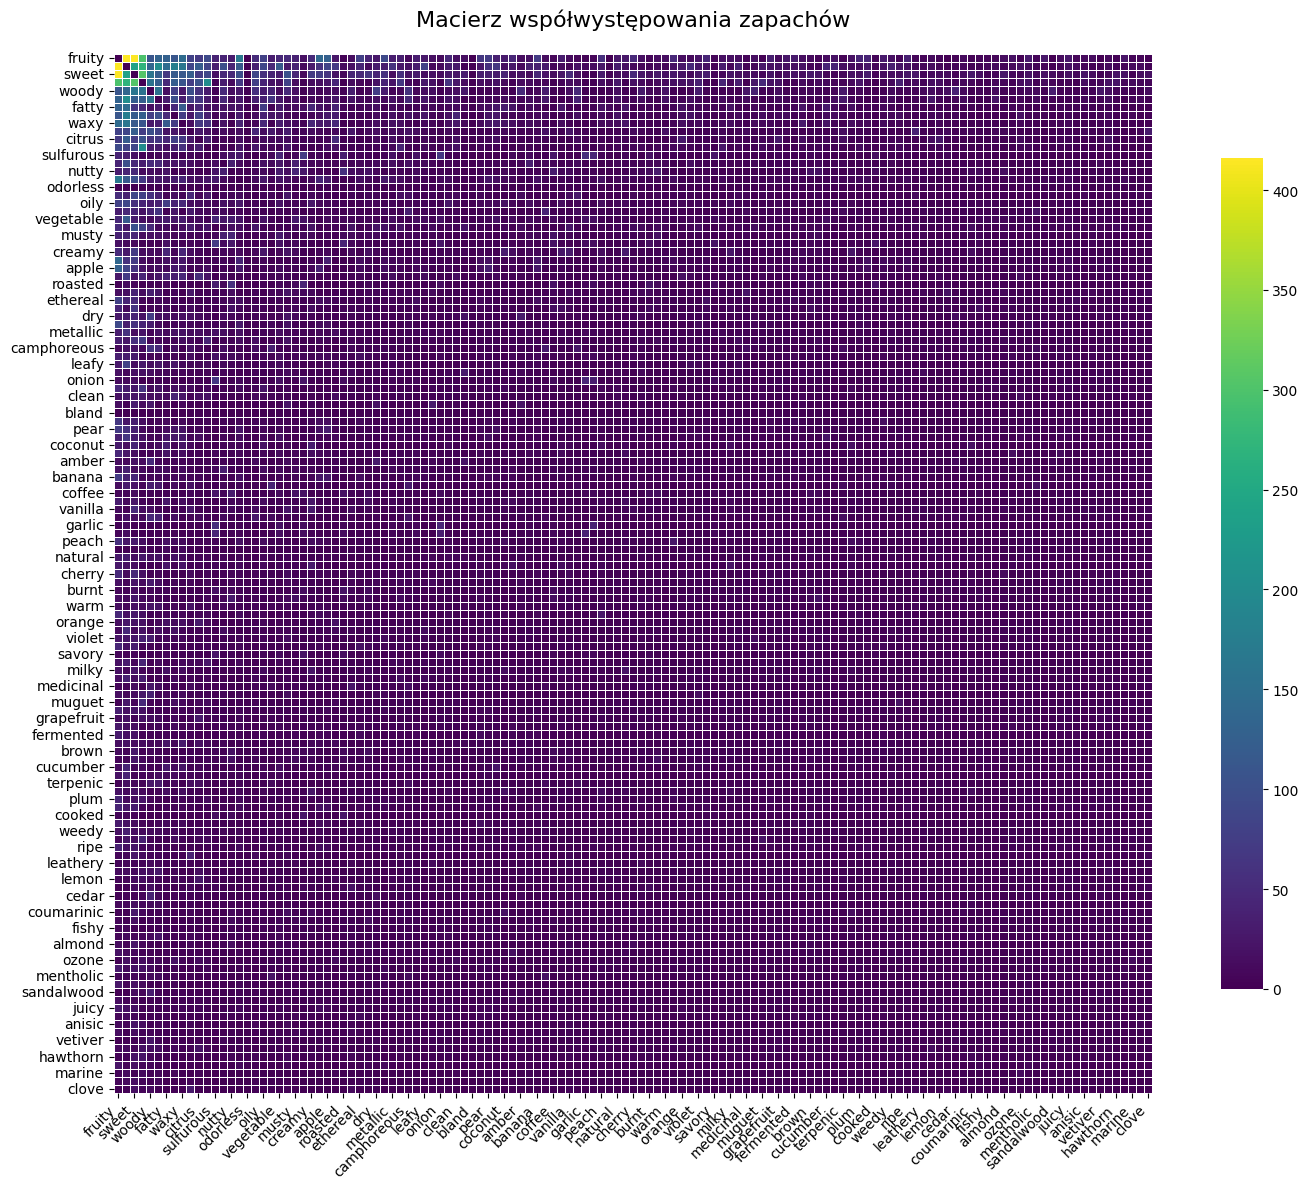

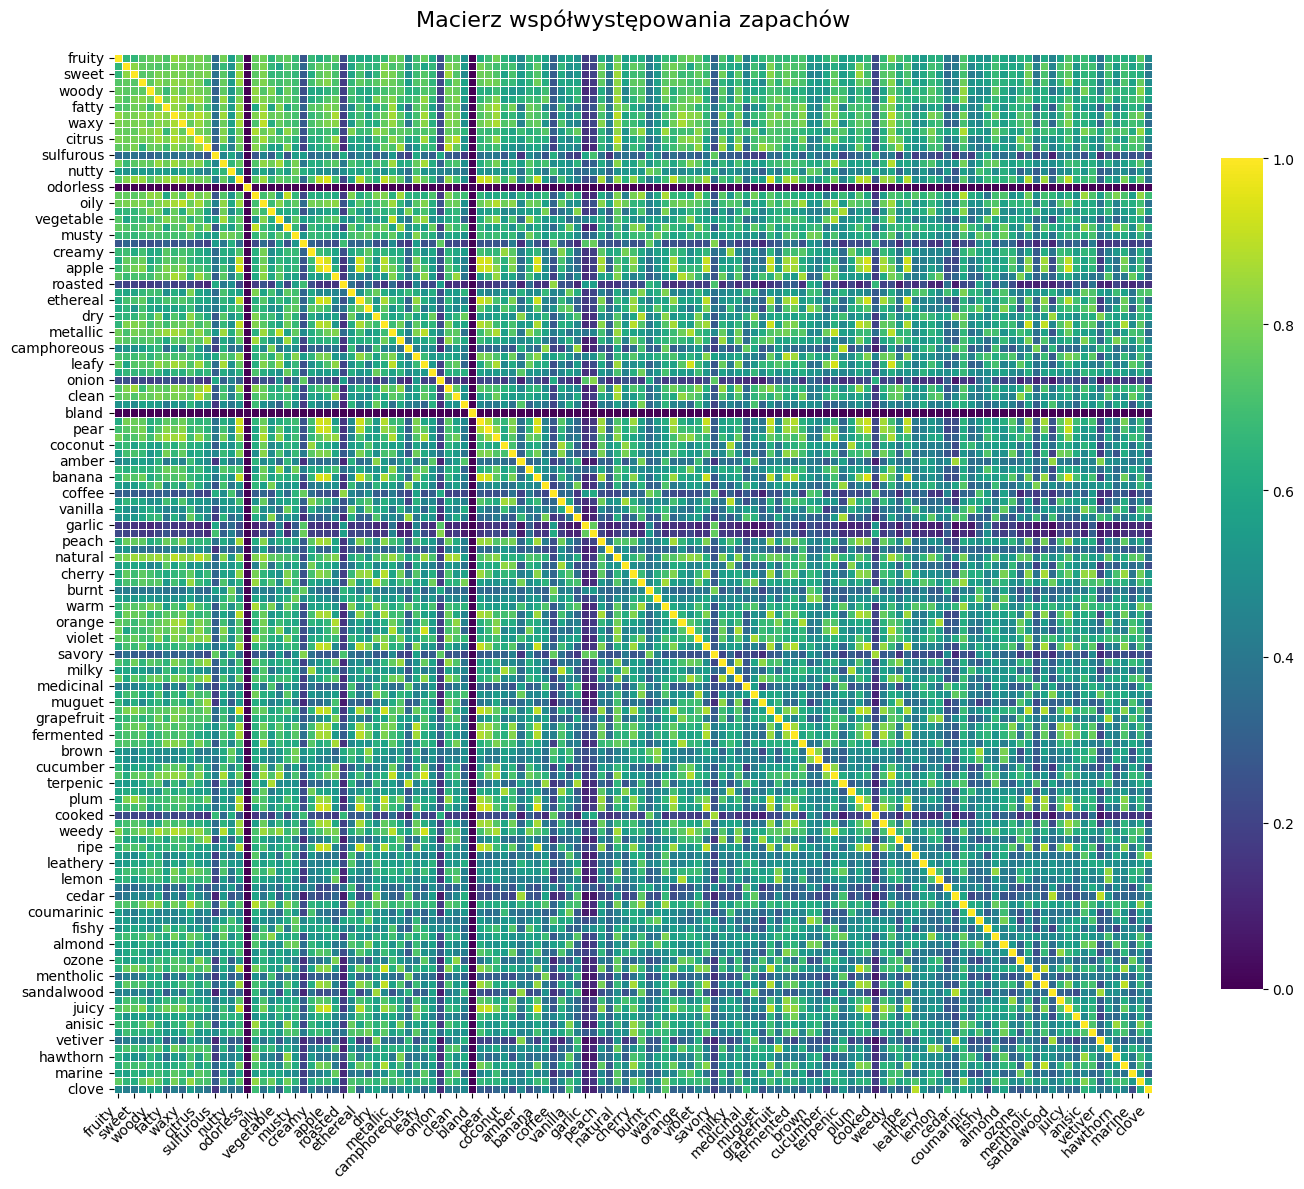

In [26]:
from predicting_odor_from_molecular_structure import pco_occurrence_matrix
matrix = pco_occurrence_matrix(df, labels_column='Labels', counts=30)
similarity = pco_similarity_matrix(matrix)

In [30]:
from predicting_odor_from_molecular_structure import plotly_pca_kmeans
#plotly_pca_kmeans(similarity, n_components=2, n_clusters=6)
coords, clusters, df_plot = plotly_pca_kmeans(similarity, n_components=2, n_clusters=9)
df_plot

c:\Users\mikoo\miniconda3\envs\primo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,PC1,PC2,cluster,label
0,1.104442,0.231953,3,fruity
1,1.308607,-0.020088,3,green
2,1.391040,0.084832,3,sweet
3,1.492085,0.080056,3,floral
4,1.116697,0.709204,3,woody
...,...,...,...,...
124,-0.572807,0.745182,4,hawthorn
125,0.680819,-0.400356,0,jammy
126,-0.283084,0.763675,4,marine
127,0.941096,0.408493,3,anise


### Featurization

In [31]:
df.shape

(4506, 9)

In [32]:
### Random forest Mordred
from predicting_odor_from_molecular_structure import create_features

dfx = create_features(df)
dfx


100%|██████████| 4506/4506 [00:50<00:00, 89.82it/s] 


,TGSC ID,CID,Concentration %,Solvent,MolecularWeight,IsomericSMILES,IUPACName,name,Labels,mol,morgan_fp,daylight_fp
0,1000111,7476,100.0,NaN,150.17,CC(=O)C1=CC=C(C=C1)OC,1-(4-methoxyphenyl)ethanone,4'-methoxyacetophenone,"[sweet, vanilla, powdery, anisic, balsamic, ha...",<rdkit.Chem.rdchem.Mol object at 0x000001C08C5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1031871,7478,10.0,dipropylene glycol,152.15,COC1=CC=C(C=C1)C(=O)O,4-methoxybenzoic acid,4-methoxybenzoic acid,"[phenolic, animal, medicinal]",<rdkit.Chem.rdchem.Mol object at 0x000001C08C4...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1009281,7501,0.1,triacetin,104.15,C=CC1=CC=CC=C1,styrene,styrene,"[sweet, floral, balsamic]",<rdkit.Chem.rdchem.Mol object at 0x000001C08C4...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1001651,244,100.0,NaN,108.14,C1=CC=C(C=C1)CO,phenylmethanol,benzyl alcohol,"[sweet, floral, rose, fruity, phenolic, balsam...",<rdkit.Chem.rdchem.Mol object at 0x000001C08C4...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1001491,240,10.0,dipropylene glycol,106.12,C1=CC=C(C=C1)C=O,benzaldehyde,benzaldehyde,"[sweet, cherry, nutty, fruity, powdery, almond...",<rdkit.Chem.rdchem.Mol object at 0x000001C08C4...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4621,1020461,11564539,NaN,NaN,170.29,CCCCCCCC(=C)C(C)O,3-methylidenedecan-2-ol,3-methylidenedecan-2-ol,[orange],<rdkit.Chem.rdchem.Mol object at 0x000001C08D5...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4622,1027261,46195361,1.0,dipropylene glycol,146.25,CCC1OCCC(S1)C,"2-ethyl-4-methyl-1,3-oxathiane",schembl2678282,"[vegetable, floral, fruity, apricot, green, tr...",<rdkit.Chem.rdchem.Mol object at 0x000001C08D5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4623,1028151,46195364,0.1,propylene glycol,174.31,CCCCC1OCCC(S1)C,"2-butyl-4-methyl-1,3-oxathiane",schembl2676606,"[spicy, leafy, peppery, banana, fruity, oily, ...",<rdkit.Chem.rdchem.Mol object at 0x000001C08D5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4624,1554361,88571201,NaN,NaN,114.19,CC[C@@H](C)CCC=O,(4R)-4-methylhexanal,(r)-4-methylhexanal,"[fresh, green, warm]",<rdkit.Chem.rdchem.Mol object at 0x000001C08D5...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [33]:
calc = Calculator(descriptors, ignore_3D=True)
mordred_features = calc.pandas(df['mol'])

100%|██████████| 4506/4506 [00:49<00:00, 91.20it/s] 


In [65]:
mordred_features

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,7.956514,7.451864,0,0,13.619695,2.250875,4.501749,13.619695,1.238154,3.286693,...,8.906935,40.567492,150.068080,7.146099,162,13,50.0,55.0,4.583333,2.611111
1,7.956514,7.451864,1,0,13.619695,2.250875,4.501749,13.619695,1.238154,3.286693,...,8.906935,40.567492,152.047344,8.002492,162,13,50.0,55.0,4.583333,2.611111
2,5.656854,5.427660,0,0,10.424292,2.135779,4.271558,10.424292,1.303037,2.969338,...,8.298291,35.247635,104.062600,6.503913,64,7,34.0,36.0,2.611111,2.000000
3,5.656854,5.427660,0,0,10.424292,2.135779,4.271558,10.424292,1.303037,2.969338,...,8.298291,35.247635,108.057515,6.753595,64,7,34.0,36.0,2.611111,2.000000
4,5.656854,5.427660,0,0,10.424292,2.135779,4.271558,10.424292,1.303037,2.969338,...,8.298291,35.247635,106.041865,7.574419,64,7,34.0,36.0,2.611111,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,8.065904,7.893227,0,0,13.812926,2.092177,4.184353,13.812926,1.151077,3.306818,...,8.302266,40.156271,170.167065,5.004914,256,11,46.0,46.0,5.722222,3.027778
4622,6.473351,6.191587,0,0,11.142106,2.200122,4.400244,11.142106,1.238012,3.089776,...,8.606851,37.313444,146.076536,6.351154,88,9,40.0,43.0,3.472222,2.166667
4623,7.887564,7.276324,0,0,13.649148,2.212234,4.424468,13.649148,1.240832,3.278334,...,8.711608,40.046626,174.107836,6.003718,170,11,48.0,51.0,3.972222,2.666667
4624,5.059137,5.436502,0,0,9.40926,1.989044,3.978088,9.40926,1.176158,2.88852,...,7.623153,33.372552,114.104465,5.186567,76,6,28.0,27.0,4.111111,2.166667


In [66]:
from sklearn.impute import KNNImputer

mordred_features_clean = mordred_features.dropna(axis=1, thresh=int(0.8*len(mordred_features)))
imputer = KNNImputer()
mordred_imputed = imputer.fit_transform(mordred_features_clean)
mordred_imputed

array([[ 7.95651408,  7.45186446,  0.        , ..., 55.        ,
         4.58333333,  2.61111111],
       [ 7.95651408,  7.45186446,  1.        , ..., 55.        ,
         4.58333333,  2.61111111],
       [ 5.65685425,  5.42766007,  0.        , ..., 36.        ,
         2.61111111,  2.        ],
       ...,
       [ 7.88756439,  7.27632423,  0.        , ..., 51.        ,
         3.97222222,  2.66666667],
       [ 5.05913727,  5.43650183,  0.        , ..., 27.        ,
         4.11111111,  2.16666667],
       [ 5.05913727,  5.43650183,  0.        , ..., 27.        ,
         4.11111111,  2.16666667]])

In [68]:
mordred_imputed.shape

(4506, 1539)

In [67]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=label_frequencies(df, labels_column='Labels').Label.to_list())
Y = mlb.fit_transform(dfx['Labels'])

In [69]:
from skmultilearn.model_selection import iterative_train_test_split


X_train, y_train, X_test, y_test = iterative_train_test_split(mordred_imputed, Y, test_size=0.2)

In [70]:
import numpy as np

# Załóżmy, że df to Twój oryginalny DataFrame
indices = np.arange(len(dfx))
X_with_idx = np.concatenate([mordred_imputed, indices.reshape(-1, 1)], axis=1)

# Split (przyjmując, że Y to macierz etykiet)
X_train, y_train, X_test, y_test = iterative_train_test_split(X_with_idx, Y, test_size=0.2)

# Odczytaj indeksy z ostatniej kolumny
train_indices = X_train[:, -1].astype(int)
test_indices = X_test[:, -1].astype(int)

# Teraz możesz łatwo powiązać podzbiory z oryginalnym df:
df_train = df.iloc[train_indices]
df_test = df.iloc[test_indices]

In [77]:
train_indices.shape, test_indices.shape, df_train.shape, df_test.shape

((3552,), (954,), (3552, 12), (954, 12))

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain

# Binary Relevance (pojedynczy RF na każdą etykietę)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Classifier Chains
chain = ClassifierChain(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42), order='random', random_state=42)
chain.fit(X_train, y_train)



# 5 minut trening!!!!!

ClassifierChain(base_estimator=RandomForestClassifier(random_state=42),
                order='random', random_state=42)

In [ ]:
#import joblib
#joblib.dump(rf, 'random_forest_model.pkl')
#joblib.dump(chain, 'classifier_chain_model.pkl')


['random_forest_model.pkl']

In [96]:
from sklearn.metrics import f1_score

y_pred = rf.predict(X_test)
print("Binary Relevance Micro F1:", f1_score(y_test, y_pred, average='micro'))

y_pred_chain = chain.predict(X_test)
print("Classifier Chains Micro F1:", f1_score(y_test, y_pred_chain, average='micro'))

Binary Relevance Micro F1: 0.2912344925767745
Classifier Chains Micro F1: 0.30367543683470577


In [99]:
# Załóżmy, że masz indeksy molekuł w X_test_indices (np. z oryginalnego df)
# Jeśli nie, możesz np. wybrać kilka losowych próbek z testu:

import numpy as np

sample_indices = np.random.choice(X_test.shape[0], size=5, replace=False)

for idx in sample_indices:
    true_labels = mlb.inverse_transform(y_test[idx].reshape(1, -1))[0]
    pred_labels = mlb.inverse_transform(y_pred[idx].reshape(1, -1))[0]
    print(f"Molekuła nr {idx}:")
    print(f"  Prawdziwe etykiety: {true_labels}")
    print(f"  Predykowane etykiety: {pred_labels}")
    print("-" * 40)

Molekuła nr 460:
  Prawdziwe etykiety: ('sweet', 'spicy', 'minty')
  Predykowane etykiety: ('minty',)
----------------------------------------
Molekuła nr 171:
  Prawdziwe etykiety: ('sweet', 'woody')
  Predykowane etykiety: ()
----------------------------------------
Molekuła nr 345:
  Prawdziwe etykiety: ('citrus', 'lemon')
  Predykowane etykiety: ('sweet', 'citrus', 'lemon')
----------------------------------------
Molekuła nr 931:
  Prawdziwe etykiety: ('meaty', 'roasted')
  Predykowane etykiety: ()
----------------------------------------
Molekuła nr 124:
  Prawdziwe etykiety: ('green', 'earthy', 'nutty', 'musty', 'roasted', 'cocoa', 'brown', 'chocolate')
  Predykowane etykiety: ('nutty',)
----------------------------------------


In [100]:
from sklearn.metrics import f1_score, precision_score, recall_score

def sample_metrics(y_true_sample, y_pred_sample):
    f1 = f1_score(y_true_sample, y_pred_sample, average='binary')
    precision = precision_score(y_true_sample, y_pred_sample, average='binary')
    recall = recall_score(y_true_sample, y_pred_sample, average='binary')
    return f1, precision, recall

# Przykład:
f1, prec, rec = sample_metrics(y_test[10], y_pred[10])
print(f"F1: {f1:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}")

F1: 0.00, Precision: 0.00, Recall: 0.00


In [101]:
# 10. Ewaluacja per etykieta
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

results = pd.DataFrame({
    'label': mlb.classes_,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
})

results

c:\Users\mikoo\miniconda3\envs\primo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,label,precision,recall,f1_score
0,fruity,0.675676,0.500000,0.574713
1,green,0.688000,0.398148,0.504399
2,sweet,0.457143,0.234146,0.309677
3,floral,0.619835,0.401070,0.487013
4,woody,0.658537,0.412214,0.507042
...,...,...,...,...
128,clove,0.666667,0.333333,0.444444
129,cabbage,0.000000,0.000000,0.000000
130,licorice,0.500000,0.142857,0.222222
131,orangeflower,0.000000,0.000000,0.000000


In [103]:
results.sort_values(by='f1_score')

,label,precision,recall,f1_score
66,burnt,0.000000,0.000000,0.000000
92,plum,0.000000,0.000000,0.000000
89,grassy,0.000000,0.000000,0.000000
87,chocolate,0.000000,0.000000,0.000000
86,brown,0.000000,0.000000,0.000000
...,...,...,...,...
4,woody,0.658537,0.412214,0.507042
114,mentholic,0.750000,0.428571,0.545455
0,fruity,0.675676,0.500000,0.574713
12,sulfurous,0.630435,0.580000,0.604167
